CDS 465 OCEAN'S RISING HW

name: eric <br>
date: 11.25.2025

#### Import dependencies

In [1]:
#mydir = '/home/jkinser/Documents/courses/CDSCardinal/Version5/'
#mydir = '/Users/jkinser/Documents/CoursesKinser/CDSCardinal/Version5/'
mydir = '/Users/eric/Documents/CDS465/' ### ADJUST FILEPATH

pysrc = mydir + 'pysrc/'
datadir = mydir + 'data/'
popdir = mydir + 'population/'

import sys
sys.path.append( pysrc )

import numpy as np
import pandas as pd
import scipy.ndimage as nd
import matplotlib.pyplot as plt

import death, nomad, island
import Main
E = Main.Realm( datadir )
#E.ReadAll( popdir + 'mpop11.db')
E.ReadAll(popdir + 'pop3_7.db') ### ADJUST NAME
len(E.persondf)

85712

### Actual assignment starts here

#### 1. Show an image of your island. 

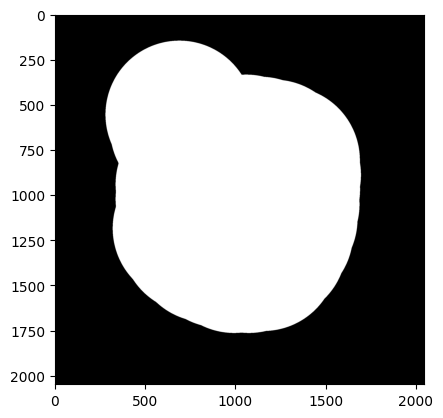

<Figure size 300x300 with 0 Axes>

In [2]:
plt.imshow(E.isle['terrain'], cmap='gray')
plt.figure(figsize=(3,3))
plt.tight_layout()
plt.show()

#### 2. Create a beach that is 100 pixels deep, but only in the lower right portion of the island. 

Find the center point of the island (not the image frame), and any point that is above this center point or to the left of the center point is not on the beach. <br>
Show your beach image. (Mine is shown)

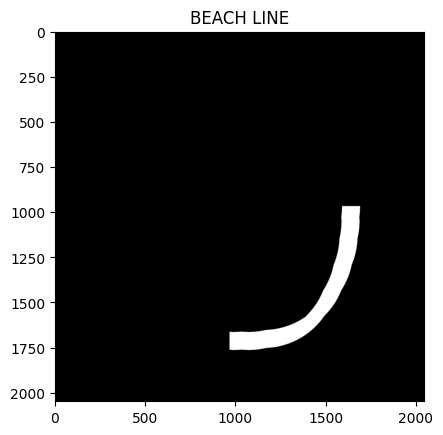

<Figure size 300x300 with 0 Axes>

In [3]:
#set mask for og island
og_mask = E.isle['terrain'] > 0 

#find isle center
center = nd.center_of_mass(og_mask)

#mask SE area of isle
beach_mask_se = np.zeros_like(og_mask, dtype=bool)
beach_mask_se[int(center[0]):, int(center[1]):] = True

#erode OG isle
eroded_mask = nd.binary_erosion(og_mask, iterations=100)

#id SE coastline
coastline_region = og_mask ^ eroded_mask 

#id just the beach
final_beach = coastline_region & beach_mask_se

plt.imshow(final_beach, cmap='gray')
plt.title('BEACH LINE')
plt.figure(figsize=(3,3))
plt.tight_layout()
plt.show()

#### 3. Find all living HOH on the beach. Print the number of these citizens. 
Move them and their families to a new location that is on the island but not the beach. (I had 167 such citizens) <br>
After you have moved these legal families, count the number of living citizens still on the beach. <br>
If you have any, determine if they are currently in jail.

In [4]:
### get HOH on the beach
beachgoers = E.persondf.query('death < 0')[['pid', 'locv', 'loch','hoh','injail']].copy()
beachgoers[['ilocv', 'iloch']] = beachgoers[['locv', 'loch']].astype(int)
beachgoers['pix'] = final_beach[beachgoers['ilocv'],beachgoers['iloch']]
beachgoers_hoh = beachgoers.query('hoh == 1 and pix == 1')

### move the families to a refugee camp 
refv,refh = 1250,750
N = len(beachgoers_hoh)
refugees = []

for i in range(N):
    ref_hoh = beachgoers_hoh.iloc[i]['pid']
    ref_fam = nomad.MyLegalFamily(E, ref_hoh)

    #loc 
    v1 = refv + (10 * np.random.rand() - 5)
    h1 = refh + (10 * np.random.rand() - 5)

    ref_fam_pids = ref_fam['pid'].values
    refugees.extend(ref_fam_pids)

    q1 = E.persondf['pid'].isin(ref_fam_pids)
    E.persondf.loc[q1,'locv'] = v1
    E.persondf.loc[q1,'loch'] = h1

In [5]:
#check if anyone is left
beachgoers2 = E.persondf.query('death < 0')[['pid', 'locv', 'loch','hoh','injail']].copy()
beachgoers2[['ilocv', 'iloch']] = beachgoers2[['locv', 'loch']].astype(int)
beachgoers2['pix'] = final_beach[beachgoers2['ilocv'],beachgoers2['iloch']]
beachgoers2.query('pix == 1')

,pid,locv,loch,hoh,injail,ilocv,iloch,pix
index,,,,,,,,
71344,71345,1508.947739,1523.736391,0,0,1508,1523,True
77803,77804,1687.370920,973.819538,0,0,1687,973,True


#### 4. Flood the beach. 
Set all pixels on your island that are on the beach to 0. <br>
Show the image or your island after the beach is flooded. (My example is shown)

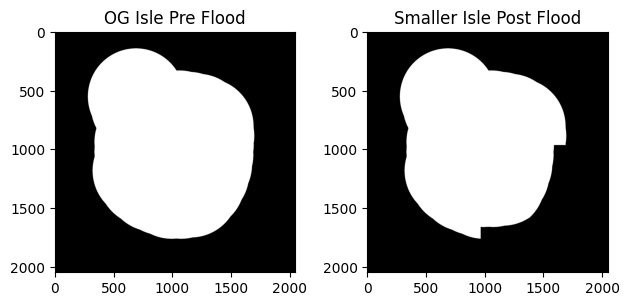

In [6]:
flooded_isle = E.isle['terrain'] & ~final_beach


fig, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(E.isle['terrain'],cmap='gray')
ax1.set_title('OG Isle Pre Flood')
ax2.imshow(flooded_isle, cmap='gray')
ax2.set_title('Smaller Isle Post Flood')
plt.tight_layout()
plt.show()

In [7]:
#set smaller isle
E.isle['terrain'] = flooded_isle + 0

### 5. Evolve 5 years with migration turned ON. 
Count the number of citizens living where the beach used to be. <br>
Print this value.

In [ ]:
#Evolve 5 years
E.Evolve(12*5, 3, 1, True)

KeyboardInterrupt: 

In [ ]:
### check locs of refugees
print(E.persondf.query('pid in @refugees')[['locv', 'loch']].describe())

#print(f'Num Refugees {len(refugees)}')

"""temp2 = E.persondf.query('pid in @refugees')[['pid','locv','loch']]
temp2['dist'] = np.linalg.norm(temp2[['locv', 'loch']].values - np.array([refv, refh]), axis=1)
temp2.sort_values(by='dist', ascending=False)"""

"temp2 = E.persondf.query('pid in @refugees')[['pid','locv','loch']]\ntemp2['dist'] = np.linalg.norm(temp2[['locv', 'loch']].values - np.array([refv, refh]), axis=1)\ntemp2.sort_values(by='dist', ascending=False)"

In [ ]:
### Count citizens living where the beach used to be

beachgoers = E.persondf.query('death < 0')[['pid', 'locv', 'loch','hoh','injail']].copy()
beachgoers[['ilocv', 'iloch']] = beachgoers[['locv', 'loch']].astype(int)
beachgoers['pix'] = final_beach[beachgoers['ilocv'],beachgoers['iloch']]
beachppl = beachgoers.query('pix == 1')
print(beachppl, '\nNumber of people living where the beach was =', len(beachppl))